### 1. Problem Statement - Build a model to predict Telecom customer churn.
2. Target variable - 'Churn'
3. Approx. 20 independent variables, 7000+ observations
4. Most of the columns, including 'Target' had 'Yes' and 'No' values - Replaced with '1's and '0's
5. Some columns had other additional values like 'No Phone Services', 'No Internet Services' -   replaced with 'No' ('0')
6. Columns with categorical values were convertred to numeric using pd.get_dummies
7. 'TotalCharges' column was originally 'object' type, though it should have been a 'float'. 
    Noticed value ' ', which made the datatype 'object'. 
    So replaced ' ' with np.nan, then converted datatype to 'float' . 
    Missing value imputed with mean.
8. Built model using LogisticRegression. Accuracy: .80  , f1 score: .59  , auc : .835

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc, log_loss ,accuracy_score

In [2]:
df=pd.read_csv('C:\\Users\\hp\\DSproject\\Excel files\\Teleco_Cust_Attr.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
for col in df.columns:
    if df[col].nunique() < 5:
        print(col, ' : ', df[col].unique())
    else:
        continue

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [8]:
df = df.replace({'Yes' : 1, 'No' : 0})

In [9]:
for col in df.columns:
    if df[col].nunique() < 5:
        print(col, ' : ', df[col].unique())
    else:
        continue

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
PhoneService  :  [0 1]
MultipleLines  :  ['No phone service' 0 1]
InternetService  :  ['DSL' 'Fiber optic' 0]
OnlineSecurity  :  [0 1 'No internet service']
OnlineBackup  :  [1 0 'No internet service']
DeviceProtection  :  [0 1 'No internet service']
TechSupport  :  [0 1 'No internet service']
StreamingTV  :  [0 1 'No internet service']
StreamingMovies  :  [0 1 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]


In [10]:
df = df.replace({'No internet service' : 0, 'No phone service' : 0})

In [11]:
for col in df.columns:
    if df[col].nunique() < 5:
        print(col, ' : ', df[col].unique())
    else:
        continue

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 0]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(14), object(6)
memo

In [13]:
df.TotalCharges.isnull().sum()

0

In [14]:
print( 'max  :  ' , df.TotalCharges.max())

max  :   999.9


In [15]:
 df.TotalCharges.min()

' '

In [16]:
 df[df.TotalCharges == ' '].TotalCharges.count()

11

In [17]:
df.TotalCharges = df.TotalCharges.replace(' ', np.nan)

In [18]:
df.TotalCharges.isnull().sum()

11

In [19]:
df.TotalCharges = df.TotalCharges.astype('float')

In [20]:
df.shape

(7043, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(14), object(5)
mem

In [22]:
df = df.drop('customerID', axis = 1)

In [23]:
df1 = df.select_dtypes(exclude = np.number)
df1.columns

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [24]:
df1 = pd.get_dummies(df1, drop_first=True)

In [25]:
df1.shape

(7043, 8)

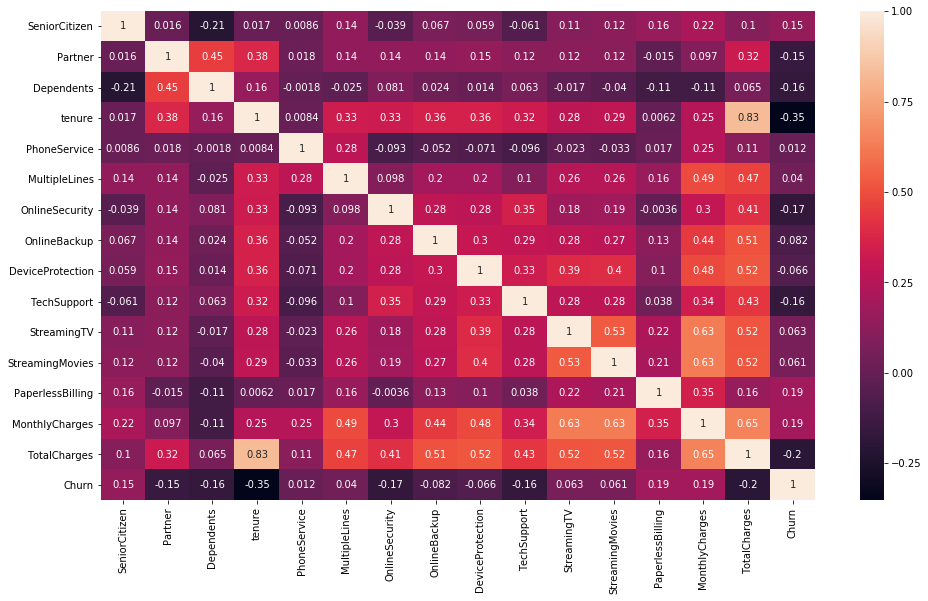

In [67]:
plt.figure(figsize=(16,9))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [78]:
corr.Churn.sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199484
tenure             -0.352229
Name: Churn, dtype: float64

In [77]:
#Identify features having low Correlation coeff with Target variable i.e. <.10
corr.Churn.sort_values(ascending = False)[(corr.Churn.sort_values(ascending = False).values < 0.1) & (- corr.Churn.sort_values(ascending = False).values < 0.1)].index

Index(['StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService',
       'DeviceProtection', 'OnlineBackup'],
      dtype='object')

In [81]:
corr.where(corr > .50)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825880,NaN
PhoneService,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.510100,NaN
DeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.522881,NaN
TechSupport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
y = df.Churn

In [27]:
X = df.drop(['Churn', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis = 1)

In [28]:
X = pd.concat([X, df1], axis = 1)

In [29]:
X.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
InternetService_DSL                       0
InternetService_Fiber optic               0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check      

In [30]:
print('min : ' ,X.TotalCharges.min())
print('max : ' ,X.TotalCharges.max())
print('mean : ' ,X.TotalCharges.mean())
print('median : ', X.TotalCharges.median())

min :  18.8
max :  8684.8
mean :  2283.3004408418697
median :  1397.475


In [31]:
from scipy.stats import iqr

In [32]:
#a = iqr(X['TotalCharges'], rng=(25,75),nan_policy='omit', interpolation='linear',axis = 0)
q1 = X.TotalCharges.quantile(.25, interpolation='linear')
q3 = X.TotalCharges.quantile(.75, interpolation='linear')
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print(q1,',',q3)
print(lower, ',', upper)

401.45 , 3794.7375
-4688.481250000001 , 8884.66875


In [33]:
X.TotalCharges = X.TotalCharges.fillna(X.TotalCharges.mean())

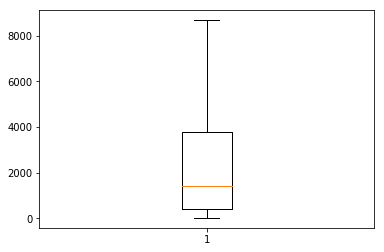

In [50]:
plt.boxplot(X.TotalCharges)
plt.show()

In [56]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,1,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,1,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,0,0,1,0,0,0,1,0


In [57]:
#Check if data is balance 
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

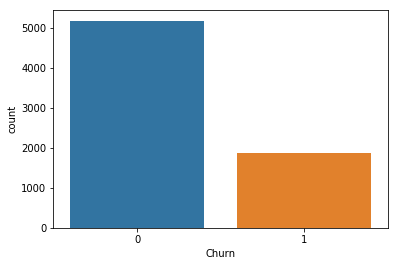

In [52]:
import seaborn as sns
sns.countplot(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [36]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,1392,168
1,254,299


In [39]:
(cm[0,0] + cm[1,1])/cm.sum()

0.8002839564600095

In [40]:
y_pred_trn = clf.predict(X_train)

In [41]:
cmtrn = confusion_matrix(y_train, y_pred_trn)
pd.DataFrame(cmtrn)

,0,1
0,3235,379
1,579,737


In [42]:
(cmtrn[0,0] + cmtrn[1,1])/cmtrn.sum()

0.8056795131845842

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.64      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [44]:
print(clf.predict_proba(X_test))

[[0.84500146 0.15499854]
 [0.88862294 0.11137706]
 [0.5643476  0.4356524 ]
 ...
 [0.85747175 0.14252825]
 [0.99324202 0.00675798]
 [0.68727867 0.31272133]]


In [45]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba

array([0.15499854, 0.11137706, 0.4356524 , ..., 0.14252825, 0.00675798,
       0.31272133])

In [93]:
[fpr,tpr,thr] =roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(clf.__class__.__name__+" accuracy is %2.4f" % accuracy_score(y_test, y_pred))
print(clf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(clf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(tpr.mean())


Train/Test split results:
LogisticRegression accuracy is 0.8003
LogisticRegression log_loss is 0.426
LogisticRegression auc is 0.835
0.6177838090365064


In [86]:
print(thr[513])
print(fpr[513])
print(tpr[513])

0.07220975391461328
0.5852564102564103
0.9511754068716094


(0.0, 1.05)

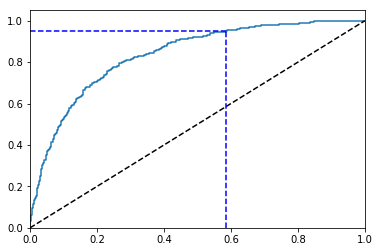

In [91]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

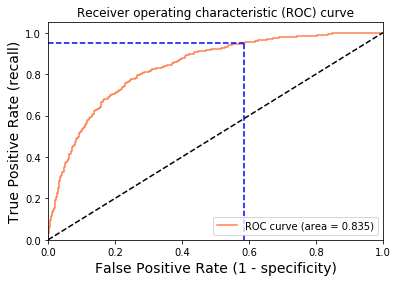

Using a threshold of 0.072 guarantees a sensitivity of 0.951 and a specificity of 0.415, i.e. a false positive rate of 58.53%.


In [47]:


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [82]:
idx

513